# Data 622
## Assignment 7 - Convolutional Neural Network (CNN)
Mark Ly
Student ID: 00504696

In [40]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Loading Dataset
There are 50,000 32 x 32 images in the training set, each with a 3 color channel. 

The dataset has 100 different fine labels 

In [41]:
(X_train,y_train), (X_test,y_test) =cifar100.load_data(label_mode='fine')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


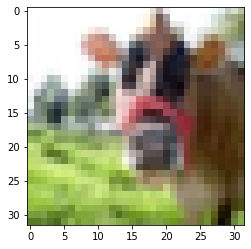

[19]


In [42]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()
print(y_train[0])

## Splitting the data 


In [43]:

num_classes = 100
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## CNN Architecture

The first stack of convolution layers has 64 units and pooling is done on a 2 x 2 grid. The second stack we increased units to 128, again pooling with a 2x2 grid and finally we have a dense layer of 512 units before changing the final layer back to the length of classes (100). 

ReLU activation function was used for the convolution stacks with the function $f(x)=max(0,x)$. If x is less than 0, the activation function becomes zero, otherwise it increases linearly with x.

The model was then evaluated using _categorical crossentropy_ as the loss function and _accuracy_ for the metric.

In [44]:
model = Sequential()

model.add(Conv2D(64, (3, 3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



## Fitting the model
We will use a batch size of 128 and 10 epochs. 

The average run time for each epoch was ~6-7 minutes

In [45]:
model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
391/391 [==============================] - 431s 1s/step - loss: 3.8361 - accuracy: 0.1149
Epoch 2/10
391/391 [==============================] - 431s 1s/step - loss: 3.0127 - accuracy: 0.2601
Epoch 3/10
391/391 [==============================] - 430s 1s/step - loss: 2.5800 - accuracy: 0.3485
Epoch 4/10
391/391 [==============================] - 430s 1s/step - loss: 2.2612 - accuracy: 0.4138
Epoch 5/10
391/391 [==============================] - 430s 1s/step - loss: 1.9749 - accuracy: 0.4768
Epoch 6/10
391/391 [==============================] - 431s 1s/step - loss: 1.7332 - accuracy: 0.5328
Epoch 7/10
391/391 [==============================] - 430s 1s/step - loss: 1.4853 - accuracy: 0.5879
Epoch 8/10
391/391 [==============================] - 434s 1s/step - loss: 1.2506 - accuracy: 0.6442
Epoch 9/10
391/391 [==============================] - 435s 1s/step - loss: 1.0275 - accuracy: 0.7020
Epoch 10/10
391/391 [==============================] - 431s 1s/step - loss: 0.8149 - accura

# Evaluating on test data

The network above gave test loss of 3.082 and a test accuracy of 39.4%

In [46]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 24s 77ms/step - loss: 3.0816 - accuracy: 0.3943
Test loss 3.081646680831909
Test accuracy 0.39430001378059387


## Predictions
Using the trained model to predict on the X_test dataset. 

In [54]:
predictions = model.predict(X_test)
np.argmax(np.round(predictions[1]))
print(np.argmax(np.round(y_test[1])))

80
33


## Showing images
Randomly selecting 5 numbers to display 5 images, we predicted 2/5 correctly which matches our model accuracy of 40%.

To improve the model we may modify our architecture by including a dropout layer after each convolution block. At the cost of training time, we could increase the units to 1040.

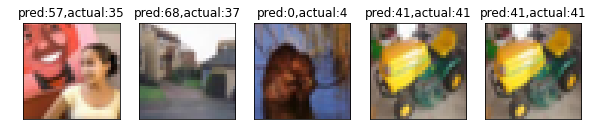

In [61]:

plt.figure(figsize=(10,10))
for i in range(5):
    rand_num = np.random.randint(0,101)

    cifar_img = plt.subplot(1,5,i+1)
    plt.imshow(X_test[rand_num])

    plt.xticks(color="None")
    plt.yticks(color="None")

    plt.tick_params(length=0)
    plt.title('pred:{0},actual:{1}'.format(np.argmax(np.round(predictions[rand_num])),
                                        np.argmax(np.round(y_test[rand_num]))))
 
plt.show()

## References
[Keras Convolutional Neural Network for CIFAR-100 - Andrew Kruger](https://andrewkruger.github.io/projects/2017-08-05-keras-convolutional-neural-network-for-cifar-100)

[CIFAR-100: Pre-processing for image recognition task - Chetna Khanna](https://towardsdatascience.com/cifar-100-pre-processing-for-image-recognition-task-68015b43d658)

[4 Proven Tricks to Improve your Deep Learning Model’s Performance - 'PulkitS'](https://www.analyticsvidhya.com/blog/2019/11/4-tricks-improve-deep-learning-model-performance/)
